In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.max())
X_train

255


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1).astype("float32")
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32")
print(X_train.max())
print(X_train.shape)

255.0
(60000, 28, 28, 1)


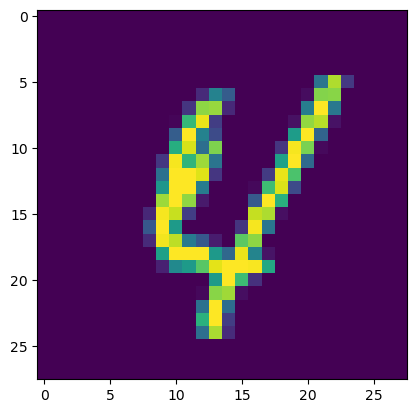

In [5]:
plt.imshow(X_train[700])
plt.show()

1.0


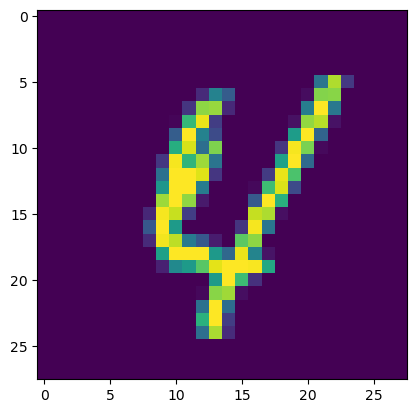

In [6]:
X_train /= 255
X_test /= 255
print(X_train.max())
plt.imshow(X_train[700])
plt.show()

In [7]:
n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax")
])

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0312 - val_accuracy: 0.9896
Epoch 2/10
469/469 [==============================] - 133s 284ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 3/10
469/469 [==============================] - 131s 279ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0295 - val_accuracy: 0.9902
Epoch 4/10
469/469 [==============================] - 130s 278ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0283 - val_accuracy: 0.9917
Epoch 5/10
469/469 [==============================] - 131s 280ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0306 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 122s 261ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 114s 243ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0259 -

In [12]:
z_predict = model.predict(X_test)
print(np.sum(z_predict.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test))

313/313 [==============================] - 3s 9ms/step
0.9915
